# Laboratorio 3

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
data = pd.read_csv('./digit-recognizer/train.csv')

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape

(42000, 785)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [15]:
label_counts = {}
for x in data["label"]:
    if x not in label_counts:
        label_counts[x] = 1
    else:
        label_counts[x] += 1

print(label_counts)

{1: 4684, 0: 4132, 4: 4072, 7: 4401, 3: 4351, 5: 3795, 8: 4063, 9: 4188, 2: 4177, 6: 4137}


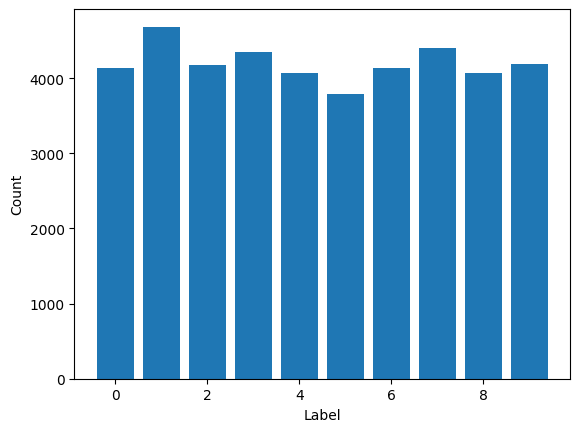

In [16]:
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Al observar la grafica del conteo de labels se puede observar que el dataset se encuentra balanceado por lo que no es necesario realizar un balanceo de datos y se puede continuar con la clasificacion. 

In [17]:
full_train = data.copy()

Precisión: 0.8982


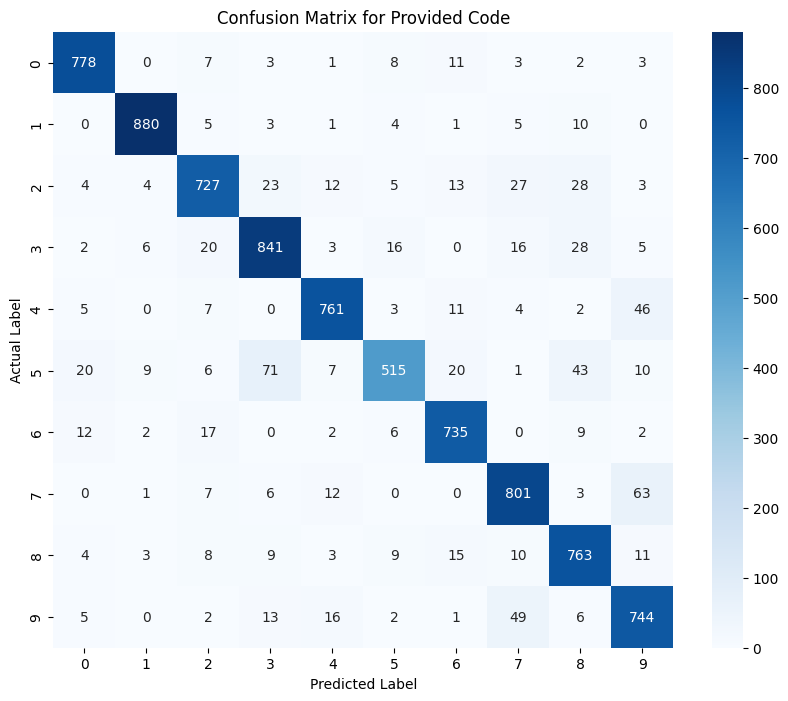

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


y = data["label"]
X = data.drop("label", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
parameters = [(15,), (25,), (50,)]

# Creación de la red neuronal
best_model = None
best_accuracy = 0
# Aquí estamos creando una red neuronal con una capa oculta de 5 neuronas
#for i in range(3):
mlp = MLPClassifier(hidden_layer_sizes=(15,), max_iter=1000, activation='relu', solver='adam', random_state=42)

# Entrenamiento
mlp.fit(X_train, y_train)

# Predicciones
y_pred = mlp.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)


# Evaluación
#print("Modelo", i+1)
accuracy = accuracy_score(y_test, y_pred)
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = mlp
print(f"Precisión: {accuracy:.4f}")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Provided Code')
plt.show()

El modelo de red neuronal simple tuvo un accuracy de 0.89 por lo que variando algunos parametros se puede mejor la precision. Tambien al observar la matriz de confusion, se puede ver que el modelo tiene problemas para clasificar los numeros 4 y 9, al igual que 9 y 7. Estos presentan ser los errores mas comunes del modelo y el numero 1 es el que mejor clasifica.

##### Random forest

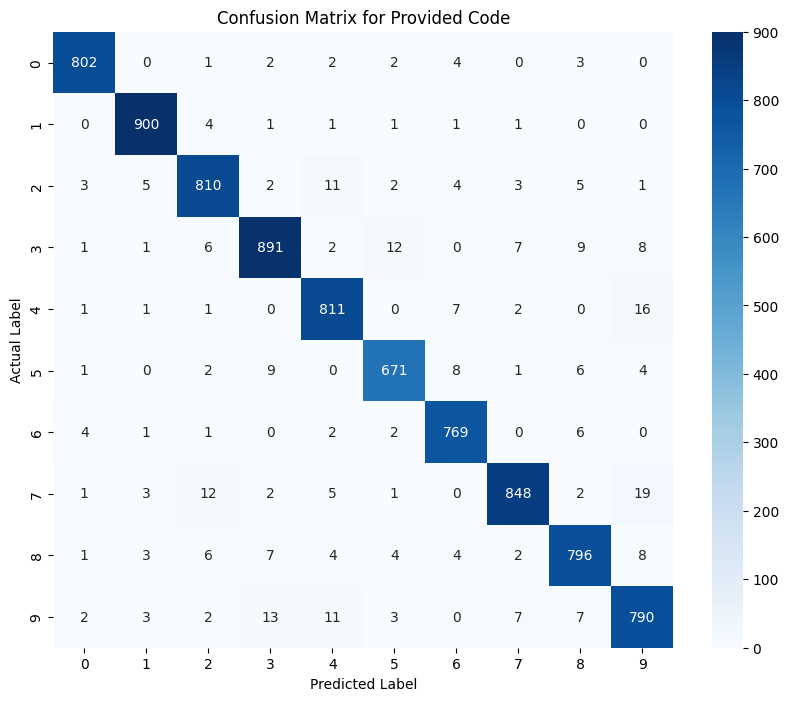

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Executing the provided code

# Cargando el conjunto de datos
best_model_rf = None
best_accuracy_rf = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred_provided_code = clf.predict(X_test)

accuracy_provided_code = accuracy_score(y_test, y_pred_provided_code)
if accuracy_provided_code > best_accuracy_rf:
    best_accuracy_rf = accuracy_provided_code
    best_model_rf = clf

# Compute the confusion matrix for the provided code's predictions
conf_mat_provided_code = confusion_matrix(y_test, y_pred_provided_code)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_provided_code, annot=True, fmt="d", cmap="Blues", 
            xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Provided Code')
plt.show()



El modelo tuvo un accuracy de 96.28%. Para este modelo, en la matriz de confusión, se observa como se tuvieron muy buenos resultados y los errores se  encuentran en números que podrían tener caracteristicas similares entre ellos (4, 9), (9,7). Esto podría deberse a la similitud entre estos números en su forma, esto tambien depende de la calidad de las imagenes utilizadas para el entrenamiento. Para este modelo, las mejores calsificaciones las obtiene el número 1 mientras que el menor lo obtuvo el número 5. 

In [20]:
print(accuracy_provided_code)

0.9628571428571429
